In [2]:
import pandas as pd
import numpy as np
import datetime

from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
import seaborn as sns

try:
    games = pd.read_csv('/datasets/games.csv')
    
except:
    games = pd.read_csv('/Users/vadimhlebnikov/Downloads/games.csv')

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Содержание
* [Изучение данных](#chapter1)
* [Предобработка данных](#chapter2)
* [Исследовательский анализ данных](#chapter3)
 * [Анализ продаж игр на всех платформах](#chapter3.1)
 * [Анализ данных актуального периода](#chapter3.2)
 * [Изучение зависимости между оценками и продажами](#chapter3.3)
 * [Анализ продаж по жанрам](#chapter3.4)
 * [Портреты регионов продаж](#chapter3.5)
 * [Проверка гипотез о равенстве рейтингов](#chapter3.6)
* [Общий вывод](#chapter4)

## Изучение данных <a class ="anchor" id="chapter1"></a>


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<AxesSubplot:>

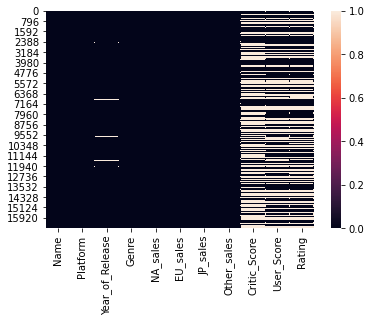

In [4]:
#построим тепловую карту пропусков
cols = games.columns
sns.heatmap(games[cols].isna())

In [5]:
year_group = games.groupby('Year_of_Release').count()
year_group['critic_Score_na_share'] = 1 - (year_group['Critic_Score']/ year_group['NA_sales'])
year_group['user_Score_na_share'] = 1 - (year_group['User_Score']/ year_group['NA_sales'])
year_group



,Name,Platform,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,critic_Score_na_share,user_Score_na_share
Year_of_Release,,,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,0,1.000000,1.000000
1981.0,46,46,46,46,46,46,46,0,0,0,1.000000,1.000000
1982.0,36,36,36,36,36,36,36,0,0,0,1.000000,1.000000
1983.0,17,17,17,17,17,17,17,0,0,0,1.000000,1.000000
1984.0,14,14,14,14,14,14,14,0,0,0,1.000000,1.000000
1985.0,14,14,14,14,14,14,14,1,1,1,0.928571,0.928571
1986.0,21,21,21,21,21,21,21,0,0,0,1.000000,1.000000
1987.0,16,16,16,16,16,16,16,0,0,0,1.000000,1.000000
1988.0,15,15,15,15,15,15,15,1,1,1,0.933333,0.933333


In [6]:
platform_group = games.groupby('Platform').count()
platform_group['critic_Score_na_share'] = 1 - (platform_group['Critic_Score']/ platform_group['NA_sales'])
platform_group['user_Score_na_share'] = 1 - (platform_group['User_Score']/ platform_group['NA_sales'])
display(platform_group.sort_values('critic_Score_na_share').query('critic_Score_na_share == 1'))
display(len(platform_group.sort_values('critic_Score_na_share').query('critic_Score_na_share == 1')))


,Name,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,critic_Score_na_share,user_Score_na_share
Platform,,,,,,,,,,,,
NG,12,12,12,12,12,12,12,0,0,0,1.0,1.0
NES,98,98,98,98,98,98,98,0,0,0,1.0,1.0
N64,319,316,319,319,319,319,319,0,0,0,1.0,1.0
GG,1,1,1,1,1,1,1,0,0,0,1.0,1.0
SAT,173,173,173,173,173,173,173,0,0,0,1.0,1.0
SCD,6,6,6,6,6,6,6,0,0,0,1.0,1.0
SNES,239,239,239,239,239,239,239,0,0,0,1.0,1.0
TG16,2,2,2,2,2,2,2,0,0,0,1.0,1.0
WS,6,6,6,6,6,6,6,0,0,0,1.0,1.0


14

Представленный набор данных обладает достаточной полнотой в части основных разделов, касающихся времени выхода игр, жанров и продаж. Большие объемы пропустов в оценках характерны для периоода до начала 2000-х, а также для отдельны платформ. Например, 14 платформ вообще не имеют оценок критиков и пользователей. Есть большие объемы пропусков в столбцах с рейтингами и оценками игр. С учетом масштаба пропусков и содержания разделов с пропусками корректно заполнить их не получится.

## Предобработка данных <a class ="anchor" id="chapter2"></a>

In [8]:
#Переведем название столбцов в нижний регистр 
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#Заполним пропуски в названях игр
games['name'] = games['name'].fillna('Out of name')


In [10]:
# делаем функцию, которая вытащит год выпуска из названия и заполнит пропуск в соответствующем столбце
def get_year(line):
    if 1980 < pd.to_numeric(''.join(filter(str.isdigit, line['name']))) < 2017:
        return ''.join(filter(str.isdigit, line['name']))
    
games['get_year'] = games.apply(get_year,axis=1)

games['year_of_release'] = games['year_of_release'].fillna(games['get_year'])

In [12]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'get_year'],
      dtype='object')

In [13]:
#Оценим масштабы значения 'tbd' в столбце user_score
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,get_year
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,None
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,None
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,None
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,None
657,Frogger's Adventures: Temple of the Frog,GBA,None,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,None
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,None
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,None
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,None
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,None


In [14]:
games['user_score'].isna().sum()

6701

In [15]:
#Заменим 'tbd' на пропуски
games = games.replace('tbd', np.nan)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера V.2</h3>
    
Можно такое сделать как `pd.to_numeric(errros='coerce')`, так всё, что не является числом, заменится на пропуск и приведётся нужный тип
</div>    


In [16]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,get_year


In [17]:
games['user_score'].isna().sum()

9125

<div class="alert alert-danger"; style="border-left: 7px solid red">
<h3>👀 Комментарий ревьюера</h3>
    
`tbd` указывают, когда данных недостаточно для того, чтобы посчитать рейтинг, т.е. по факту это пропуск. Т.к. ты не стал заменять пропуски и аргументированно это сделал, то довольно странно заменять пропуски и тут. Чтобы так заменять, нужно вообще говоря показать, что рейтинг зависит от продаж. Разница между средними ниже может быть случайной, для этого можно пользоваться множественной проверкой гипотез, типа ANOVA, но про это будет дальше в курсе, поэтому сейчас заморачиваться не стоит. Идеи с группировкой неплохие, но есть много тонкостей. Более того, такая замена потом может корреляцию сместить
</div> 

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
    Заменил 'tbd' пропусками
</div>

<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
Хардкодить числа не стоит, почему бы по индексам не брать их из таблички сгруппированной?</div> 

In [18]:
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16464 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  get_year         778 non-null    object 
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [19]:
#Посчитаем суммарные продажи по всем регионам
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) 
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,get_year,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,None,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,None,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,None,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,None,0.01


<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Можно ещё: `games[['na_sales','eu_sales',..].sum(axis=1)`. Такая запись полезна, когда хочется просуммировать колонки из списка</div>    


<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
    Спасибо. Очень удобно!
</div>

In [20]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [21]:
len(games)

16715

In [22]:
#выявим дубликаты в датафрейме и удалим их
games[games.duplicated(subset=['platform','year_of_release','name'])]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,get_year,total_sales
14244,Out of name,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN,None,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E,None,0.01


In [23]:
games = games.drop_duplicates(subset=['platform','year_of_release','name'])
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,get_year,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,None,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,None,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,None,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,None,0.01


 ## Исследовательский анализ данных <a class ="anchor" id="chapter3"></a>

### Анализ продаж игр на всех платформах <a class ="anchor" id="chapter3.1"></a>

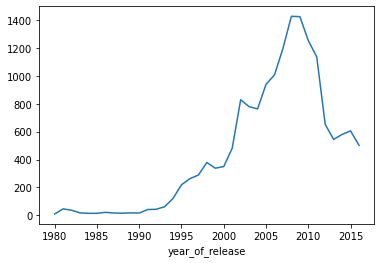

In [24]:
#Изучим выход игр по годам
games_time = games.groupby('year_of_release').count()['name'].plot()


До 1990 года продавалось очень мало игр. Данные за этот период можно исключить из анализа.

In [25]:
#Определеим самые популярные платформы
plot_data= games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
top_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [26]:
top_platforms['platform'].tolist()


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [27]:
top_plot_data = plot_data[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']]
top_plot_data

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
year_of_release,,,,,,,,,,
1980.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985.0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04
1986.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [28]:
top_plot_data

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
year_of_release,,,,,,,,,,
1980.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985.0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04
1986.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


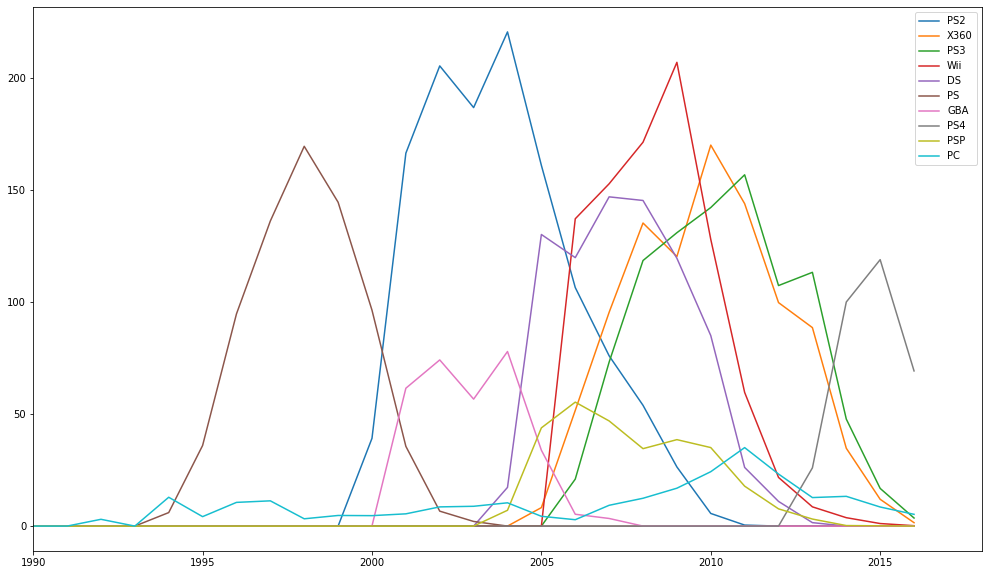

In [29]:
#Построим график распределение продах по годам среди ТОП-10 самых популярных платформ
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
ax.plot(top_plot_data,label = top_plot_data.columns)
ax.set_xlim(1990, 2018)
ax.legend(top_plot_data.columns)
fig.show()

In [30]:
#Рассчитаем медианный сок присутствия платфорым на рынке
games.groupby('platform')['year_of_release'].nunique().median()

7.0

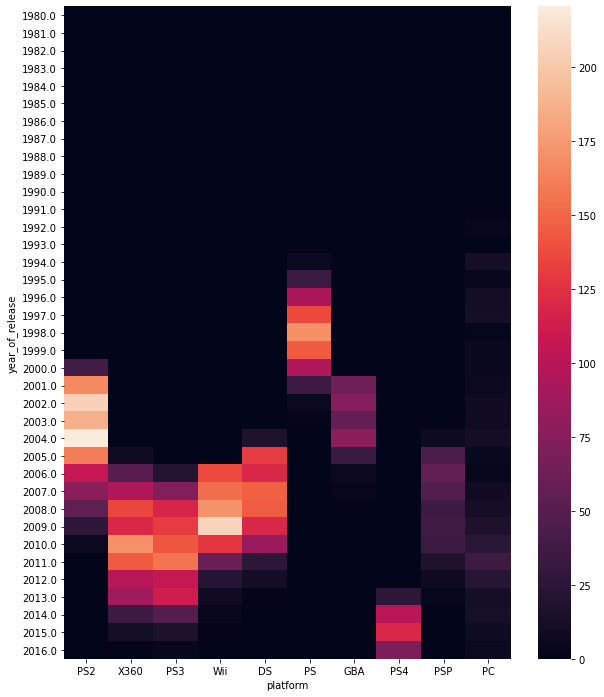

In [31]:
plt.figure(figsize = (10,12))
ax = sns.heatmap(top_plot_data)


Как видно на графиках и из расчетов, жизненный цикл платформ составляет порядка 7 лет. PlayStation выпусказал новое поколение совей платформы примерно каждые шесть лет: в 1994, 2000, 2006 и 2013 годах. Nintendo между запусками GameBoy Advance и Nintendo DS прошло порядка 4 года, и их жизненный цикл составлял 5-7 лет. 


### Анализ данных актуального периода <a class ="anchor" id="chapter3.2"></a>

In [32]:
actual_plot_data = plot_data

In [33]:
#С учетом выхода продаж игр на плато в 2012 году, ограничим этой датой актуальный период

actual_plot_data = plot_data
actual_plot_data = actual_plot_data.query('year_of_release > 2011')
actual_platforms = actual_plot_data.sum().reset_index() 
actual_platforms.columns = ['platform', 'sells']
actual_platforms = actual_platforms.query('sells > 0')
actual_platform_list = actual_platforms['platform'].tolist()

actual_platform_list

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

In [34]:
actual_plot_data = actual_plot_data[['3DS',
 'DS',
 'PC',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'Wii',
 'WiiU',
 'X360',
 'XOne']]

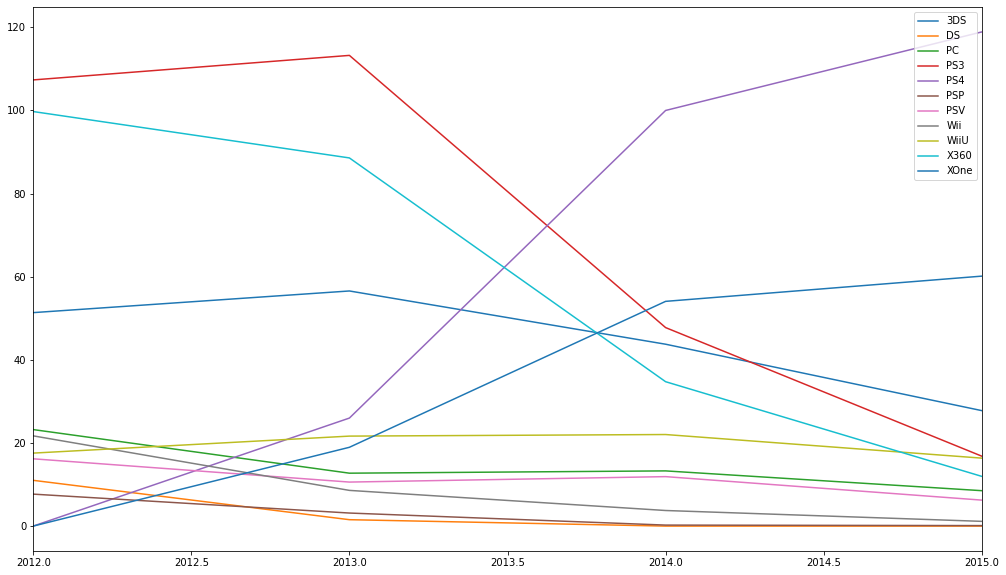

In [35]:
#Построим графики и изучим данные по всем платформам с 2012 года, обрезав 2016 год, так как по нему очевидно неполные годовые данные

fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
ax.plot(actual_plot_data)
ax.set_xlim(2012, 2015)
ax.legend(actual_plot_data)
fig.show()

**К числу растущих платформ можно отнести PS4 и XOne**, которые стартовали в 2013 года и стремятся к пику своего жизненного цикла. X360 и PS3, лидировавшие в начале 2010-х, находятся в завершающей стадии своего жизненного цикла и показывают динамичный спад продаж. 3DS все еще показывает существенные продажи, заметен выраженный ниспадающий тренд. WiiU достигла своего пика в 2014 году и уже уже по итогам 2015 года был заметный спад продаж, который, вероятно, продолжится по итогам 2016 года и в 2017-м.

In [36]:
#Обрежем стартовый датафрейм по актуальному периоду и платформам
actual_games = games.query('year_of_release > 2011')
actual_games = actual_games[(games['platform'].isin(actual_platform_list))]


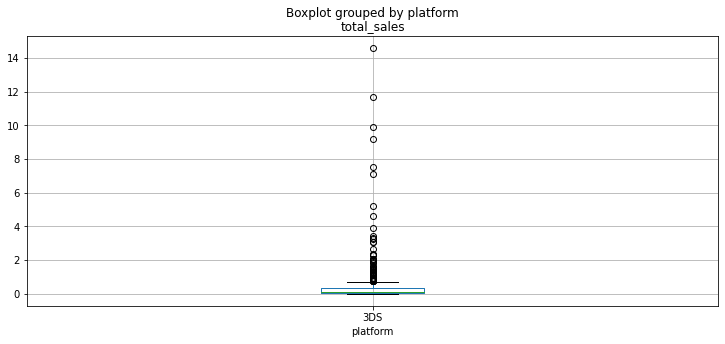

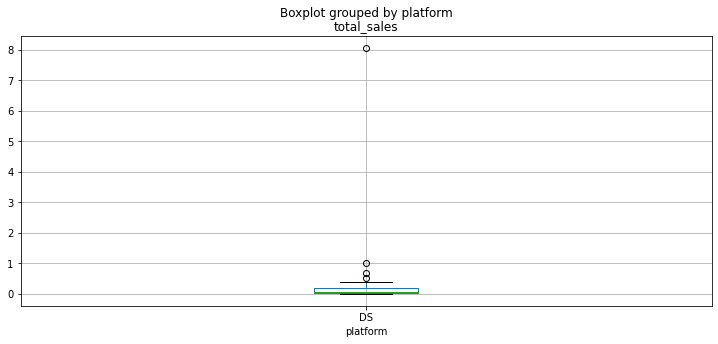

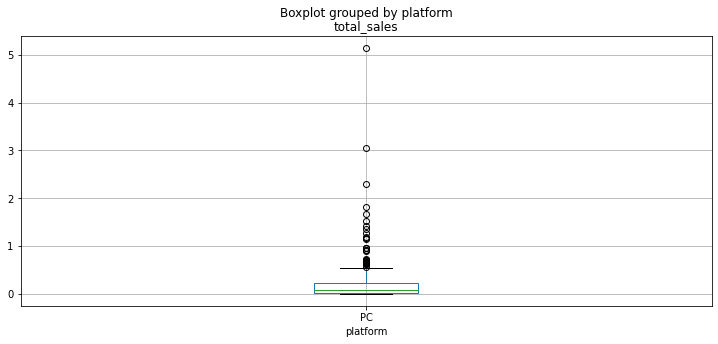

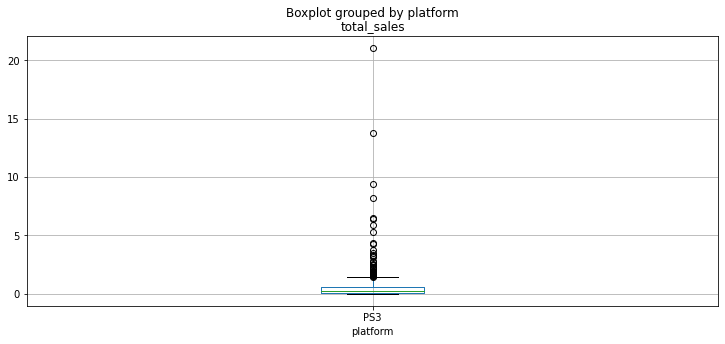

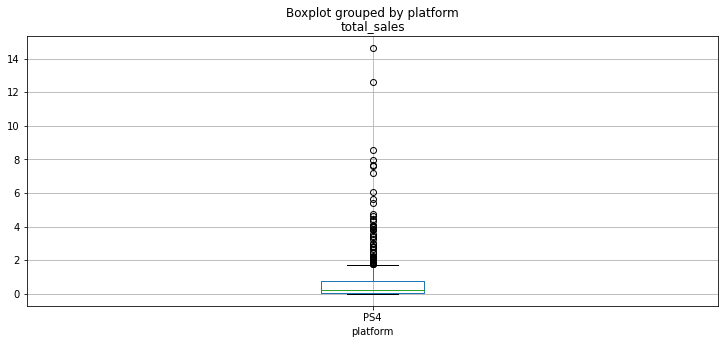

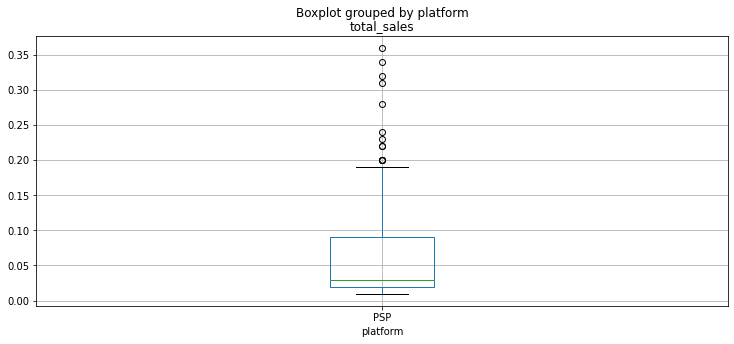

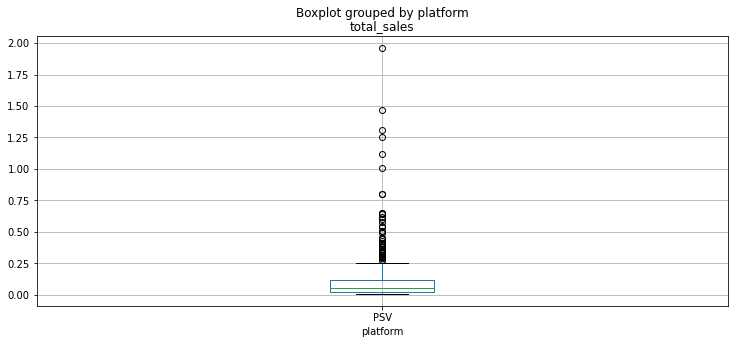

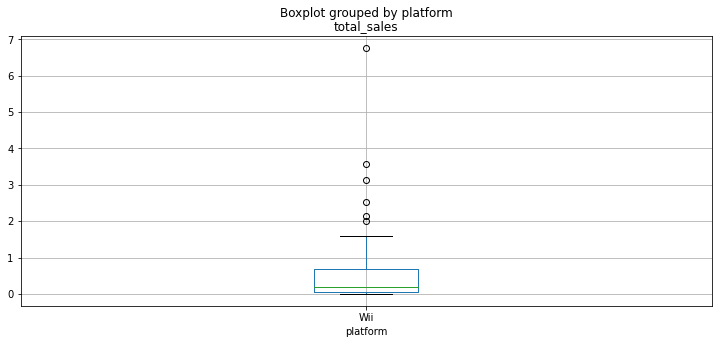

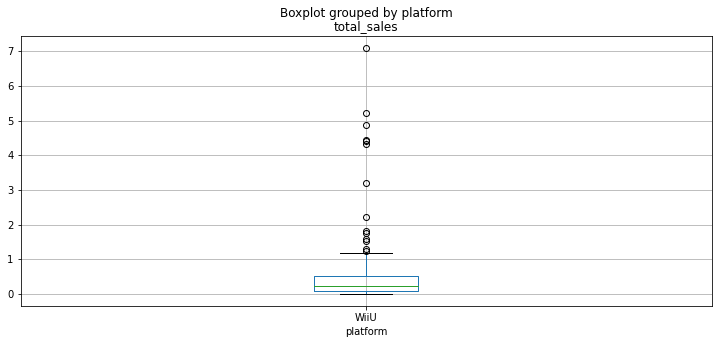

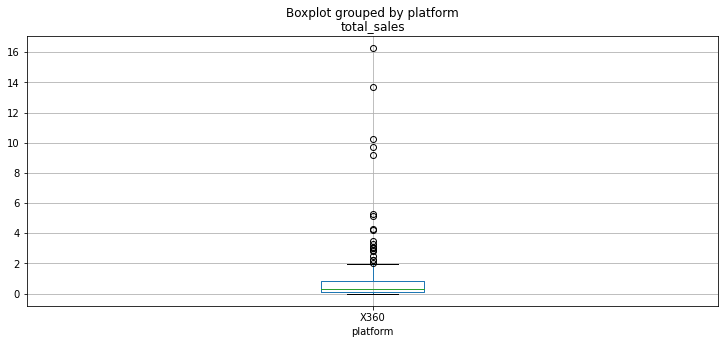

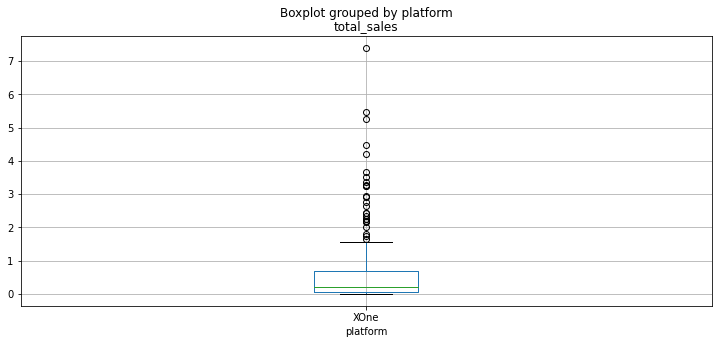

In [37]:
#Построим "ящики с усами" дла актуальных платформ
for i in actual_platform_list:
    actual_games[actual_games['platform'] == i].boxplot('total_sales', by='platform', figsize = (12,5))

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

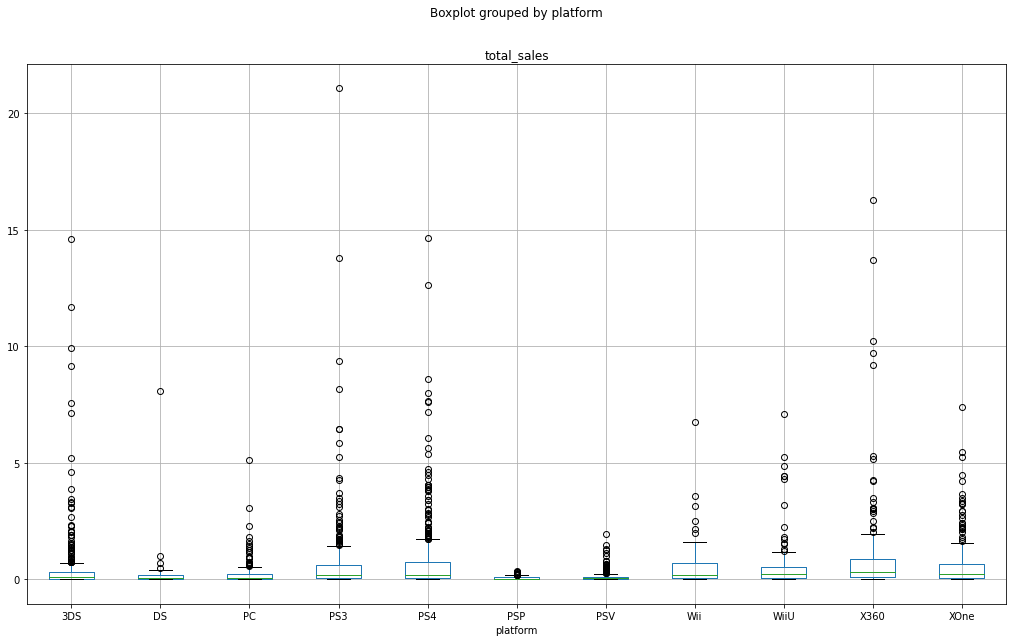

In [38]:
 #Взглянем на ситуацию на общем графике
actual_games.boxplot('total_sales', by='platform', figsize = (17,10))

In [39]:
#Выделим медианы
actual_games.groupby('platform')['total_sales'].median().sort_values(ascending=False)

platform
X360    0.31
WiiU    0.22
XOne    0.22
PS4     0.20
PS3     0.20
Wii     0.18
3DS     0.11
PC      0.08
DS      0.05
PSV     0.05
PSP     0.03
Name: total_sales, dtype: float64

In [40]:
#Изучим межквартилный интервал
ps3d = actual_games[actual_games['platform'] == 'PS3']['total_sales'].describe().reset_index()
ps4d = actual_games[actual_games['platform'] == 'PS4']['total_sales'].describe().reset_index()
x360d = actual_games[actual_games['platform'] == 'X360']['total_sales'].describe().reset_index()
xoned = actual_games[actual_games['platform'] == 'XOne']['total_sales'].describe().reset_index()

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
display_side_by_side(ps3d,ps4d,x360d,xoned, titles=['PS3','PS4','X360','XOne'])    

,index,total_sales
0,count,492.000000
1,mean,0.586951
2,std,1.464113
3,min,0.010000
4,25%,0.050000
5,50%,0.200000
6,75%,0.610000
7,max,21.050000
,index,total_sales
0,count,392.000000


**Медианные продажи у растущих платформ PS4 и XOne с 2012 года составляют соответственно 0.20 и 0.22 млн копий**. У уходящих лидеров X360, PS3 0.31 и 0.20. PS4, PS3, X360 и XOne имеют довольно широкий межквартильный размах, достигающий в третьям квантиле 0.6 - 0.9 млн копий. Также данные платформы выделяются довольно большим количеством выбросов, то есть суперхитовых игр. Сравинительно много хитов с продажами более 2 млн копий у платформ PS4 и PS3. Таккже значительное число "выбросов" у XOne и X360. Из портативных потформ выделяется Nintendo 3DS с семью проектами, проданными тиражом более 5 млн копий.

### Изучение зависимости между оценками и продажами <a class ="anchor" id="chapter3.3"></a>

In [41]:
actual_games_ps3 = actual_games[actual_games['platform'] == 'PS3']
actual_games_x360 = actual_games[actual_games['platform'] == 'X360']

#Функция, убирающая выбросы. Убираем выбросы по total sales
def drop_ej(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)
    
drop_ej(actual_games_ps3,'total_sales')
drop_ej(actual_games_x360,'total_sales')


In [42]:
#Рассчитаем коэффициенты корреляции между продажми и оценками критиков и пользователй по двум популярным консолям PS3 и X360 
print('Кореляция мировых продаж с оценками критиков:', actual_games_ps3['critic_score'].corr(actual_games_ps3['total_sales']))
print('Кореляция мировых продаж с оценками пользователей:',actual_games_ps3['user_score'].corr(actual_games_ps3['total_sales']))

Кореляция мировых продаж с оценками критиков: 0.43935327981784833
Кореляция мировых продаж с оценками пользователей: 0.10730888785552825


In [43]:
print('Кореляция мировых продаж с оценками критиков:', actual_games_x360['critic_score'].corr(actual_games_x360['total_sales']))
print('Кореляция мировых продаж с оценками пользователей:',actual_games_x360['user_score'].corr(actual_games_x360['total_sales']))

Кореляция мировых продаж с оценками критиков: 0.45596137977671203
Кореляция мировых продаж с оценками пользователей: 0.14994061252001664


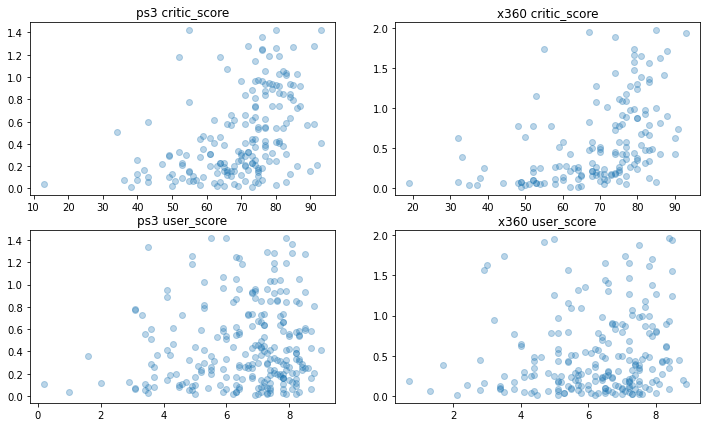

In [44]:
#Построим диаграммы рассеивания по ps3 и x360 по столбцам critic_score и user_score
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.scatter(actual_games_ps3['critic_score'], actual_games_ps3['total_sales'],alpha=0.3)
plt.title('ps3 critic_score')
plt.subplot(2, 2, 2)
plt.scatter(actual_games_x360['critic_score'], actual_games_x360['total_sales'],alpha=0.3)
plt.title('x360 critic_score')
plt.subplot(2, 2, 3)
plt.scatter(actual_games_ps3['user_score'], actual_games_ps3['total_sales'],alpha=0.3)
plt.title('ps3 user_score')
plt.subplot(2, 2, 4)
plt.scatter(actual_games_x360['user_score'], actual_games_x360['total_sales'],alpha=0.3)
plt.title('x360 user_score')

plt.show()

**Выявлен значительный коэффициент корреляции (около 0.45) между оценками критиков и мировыми продажами**. Взаимосвязь между оценками показателей отчетливо заметна на диаграммах рассеивания. Корреляция между оценками пользователей и продажами слабая (около 0.11), но на диаграммах рассеивания все же видно, что игр, показывающих хорошие продажи с высокими оценками пользователей значительно больше, чем игр с высокими продажами и низкими оценками. Впрочем, невысокая оценка критиков и пользователей не приговор. Игры с оценками пользователей в диапазоне от 4 до 6 иногда неплохо "выстреливают" по продажам. 

In [45]:
#Сравним выводы с рассеиванием данных по другим платформам (они соответствуют)
actual_games_xone = actual_games[actual_games['platform'] == 'XOne'] 
actual_games_ps4 = actual_games[actual_games['platform'] == 'PS4'] 


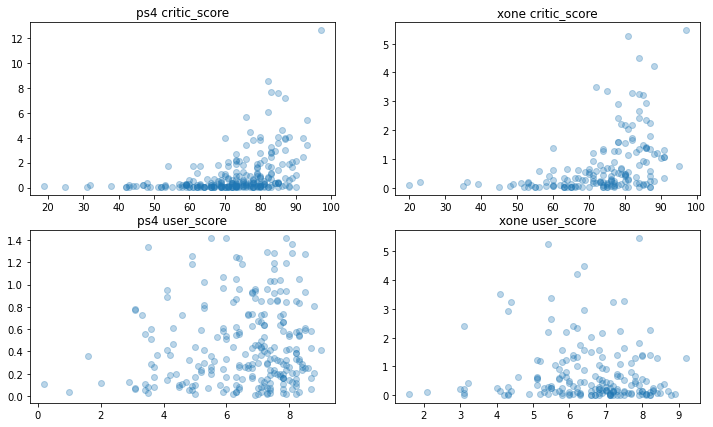

In [46]:
#По растущим платформам PS4 и XOne, но взимосвязь между оценками критиков и продаами уже очевидна
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.scatter(actual_games_ps4['critic_score'], actual_games_ps4['total_sales'],alpha=0.3)
plt.title('ps4 critic_score')
plt.subplot(2, 2, 2)
plt.scatter(actual_games_xone['critic_score'], actual_games_xone['total_sales'],alpha=0.3)
plt.title('xone critic_score')
plt.subplot(2, 2, 3)
plt.scatter(actual_games_ps3['user_score'], actual_games_ps3['total_sales'],alpha=0.3)
plt.title('ps4 user_score')
plt.subplot(2, 2, 4)
plt.scatter(actual_games_xone['user_score'], actual_games_xone['total_sales'],alpha=0.3)
plt.title('xone user_score')

plt.show()


### Анализ продаж по жанрам  <a class ="anchor" id="chapter3.4"></a>

In [47]:
#Проанализируем общие и средние продажи по жанрам, отсортируем по общим продажам.
genre_pivot = pd.pivot_table(data=actual_games,index='genre',aggfunc=['count','sum','mean','median'])[[( 'count','name'), ('sum','total_sales'),('mean','total_sales'),('median','total_sales')]]
genre_pivot.sort_values(by=('sum','total_sales'), ascending = False)


,count,sum,mean,median
,name,total_sales,total_sales,total_sales
genre,,,,
Action,1032,441.47,0.427781,0.120
Shooter,235,304.73,1.296723,0.440
Role-Playing,370,192.80,0.521081,0.140
Sports,267,181.06,0.678127,0.240
Misc,192,85.04,0.442917,0.120
Platform,85,61.00,0.717647,0.210
Racing,115,53.50,0.465217,0.140
Fighting,109,44.49,0.408165,0.130


In [48]:
genre_pivot.columns = ['число игр','сумма продаж','средняя продажа','медианная продажа']
genre_pivot.sort_values(by=(  'число игр'), ascending = False)

,число игр,сумма продаж,средняя продажа,медианная продажа
genre,,,,
Action,1032,441.47,0.427781,0.120
Role-Playing,370,192.80,0.521081,0.140
Adventure,302,29.43,0.097450,0.030
Sports,267,181.06,0.678127,0.240
Shooter,235,304.73,1.296723,0.440
Misc,192,85.04,0.442917,0.120
Racing,115,53.50,0.465217,0.140
Fighting,109,44.49,0.408165,0.130
Platform,85,61.00,0.717647,0.210


**В актуальном периоде было выпущено больше всего игр в жанре Action, также у игровых студий были популярны жанры Role-Playing, Adventure и Sports**. Меньше всего игр выпускается в жанрах  Puzzle, Strategy и Simulation.

<AxesSubplot:xlabel='genre'>

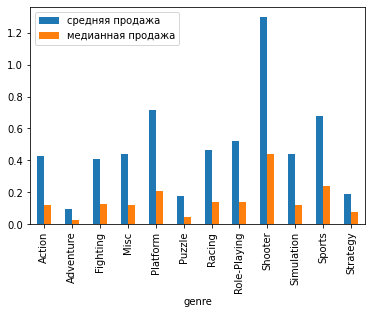

In [49]:
#Проанализируем средние и медианные продажи
genre_pivot[['средняя продажа','медианная продажа']].plot(kind='bar')

**В пересчете на одну игру безоговорочный лидер - жанр Shooter**. Хоть в нем выпускается не так много игр, как в жанрах Action или Sports, средние продажи "шутеров" составляют более 1 млн копий - это вдвое больше, чем средние продажи проектов в жанре Sports и в три раза больше, чем в жанре Action. Также по объему проданных копий выделются платформеры и ролевые игры. Хуже всего с продажами в пересчете на один проект в жанрах Adventure (где выпускалось довольно много игр), Puzzle и Strategy.	

### Портреты регионов продаж <a class ="anchor" id="chapter3.5"></a>

In [50]:
#Пишем и применяем к первому региону (Северной Америке) функцию определения "портрета" по платформам, жанрам и рейтингу
portrait_list = ['platform','genre','rating']
def portrait_maker(region):
    for i in portrait_list:
        table = actual_games.pivot_table(index=i, values = region,aggfunc='sum').sort_values(by=region,ascending=False)
        table['share'] = table[region]/table[region].sum()
        display(table.head(5))
portrait_maker('na_sales')        


,na_sales,share
platform,,
X360,140.05,0.236959
PS4,108.74,0.183984
PS3,103.38,0.174915
XOne,93.12,0.157555
3DS,55.31,0.093582


,na_sales,share
genre,,
Action,177.90,0.301000
Shooter,144.77,0.244945
Sports,81.53,0.137946
Role-Playing,64.00,0.108286
Misc,38.19,0.064616


,na_sales,share
rating,,
M,231.63,0.474924
E,114.37,0.234499
E10+,75.70,0.155212
T,66.02,0.135365


In [51]:
#Смотрим на прортрет Евросоюза
portrait_maker('eu_sales') 

,eu_sales,share
platform,,
PS4,141.09,0.278251
PS3,106.85,0.210725
X360,74.52,0.146965
XOne,51.59,0.101743
3DS,42.64,0.084093


,eu_sales,share
genre,,
Action,159.59,0.314736
Shooter,113.47,0.223780
Sports,69.08,0.136236
Role-Playing,48.53,0.095709
Racing,27.29,0.053820


,eu_sales,share
rating,,
M,194.21,0.467345
E,113.02,0.271970
E10+,55.37,0.133242
T,52.96,0.127442


In [52]:
#Смотрим на прортрет Японии
portrait_maker('jp_sales') 

,jp_sales,share
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


,jp_sales,share
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


,jp_sales,share
rating,,
E,28.33,0.338309
T,26.02,0.310724
M,21.20,0.253165
E10+,8.19,0.097803


В части консолей в Северной Америке лидировали X360(24%),PS4(18%). PS3 занимала только третье место (17,5%), а XOne - четвертое (15,8%). В ЕС другой расклад. Там лидирует PS4 (более 28%), следом идет PS3 (более 21%). X360 и XOne занимают третье и четвертое место (15 и 10% соответственно). Nintendo DS на пятой позиции с 8,4%. *В Японии ситуация обратная: у портативной игровой системы Nintendo 3DS почти половина продаж. У PS3 только 18,3%, но также была значительна доля портративной версии PS (PlayStation Vita) - 11%. Таким образом, почти две трети игр продавались в Японии для портативных платформ, против 16 и 11% соответственно в СА и Европе*.

По жанровым предпочтениям заметны большие различия между западными странами и Японией. В СА и ЕС лидирую экшены и шутеры (более 50% продаж). В Японии со значительным отрывом лидирует Role-Playing, а в пятерку самых популярных жанров не входят шутеры и спортивные игры.

В ЕС и СА доля продаж по возрастным рейтингам схожи. Около 25% приходится на игры без возрастных ограничений, порядка 13% на игры для тинэйджеров и старше. Доля игр для взрослых - около 47%. В *Японии доля продаж с рейтингом для взрослых (M) почти в два раза меньше, что говорит о том, что на данном рынке значительно меньше аппетит ко взрослому игровому контенту*.



Text(0.5, 1.0, 'jp_rating')

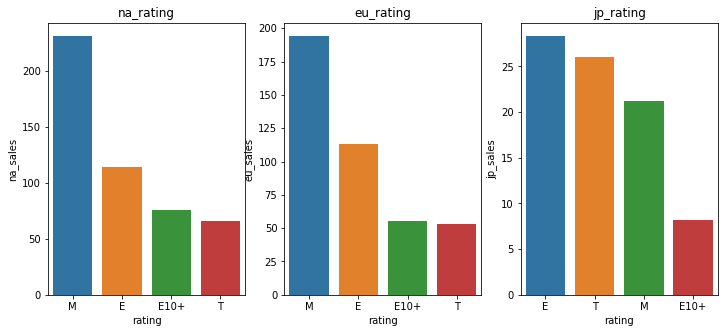

In [53]:
p1=actual_games.pivot_table(index='rating', values = 'na_sales' ,aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)#.plot(kind='bar')
p2=actual_games.pivot_table(index='rating', values = 'eu_sales' ,aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)#.plot(kind='bar',color='red')
p3=actual_games.pivot_table(index='rating', values = 'jp_sales' ,aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)#.plot(kind='bar',color='green')

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.barplot(p1['rating'],p1['na_sales'])
plt.title('na_rating')

plt.subplot(1, 3, 2)
sns.barplot(p2['rating'],p2['eu_sales'])
plt.title('eu_rating')

plt.subplot(1, 3, 3)
sns.barplot(p3['rating'],p3['jp_sales'])
plt.title('jp_rating')





### Проверка гипотез о равенстве рейтингов <a class ="anchor" id="chapter3.6"></a>

In [54]:
#Рассчитаем размеры выборок для t-теста по сравнению средних пользовательских рейтингов платформ Xbox One и PC. 
#Они значительно отличаются по размеру, поэтому укажем в тесте о том, что дисперсия выборок не равна.

print('Размер выборки XOne:', len(actual_games.query('platform == "XOne"')['user_score'].dropna()))
print('Размер выборки PC:',len(actual_games.query('platform == "PC"')['user_score'].dropna()))



Размер выборки XOne: 182
Размер выборки PC: 207


Сформулируем гипотезы:

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [55]:
alpha = 0.05
 
result_xone_vs_pc = st.ttest_ind(actual_games.query('platform == "XOne"')['user_score'].dropna(),
                            actual_games.query('platform == "PC"')['user_score'].dropna(), equal_var = False)
 
p_xone_vs_pc = result_xone_vs_pc.pvalue
print('р-значение: ',p_xone_vs_pc)
if p_xone_vs_pc < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.5926118514134862
Не получилось отвергнуть нулевую гипотезу


Сформулируем гипотезы:

H0: cредние пользовательские рейтинги жанров Action и Sports равны.

H1: средние пользовательские рейтинги жанров Action и Sports отличаются.

In [56]:
#Рассчитаем размеры выборок для т-теста по сравнению средних пользовательских рейтингов жанров Action и Sports. Они значительно отличаются по размеру, поэтому укажем в тесте о том, что дисперсия выборок не равна.

print('Размер выборки Action:', len(actual_games.query('genre == "Action"')['user_score'].dropna()))
print('Размер выборки Sports:',len(actual_games.query('genre == "Sports"')['user_score'].dropna()))


Размер выборки Action: 524
Размер выборки Sports: 194


In [57]:
alpha = 0.05
 
result_action_vs_sports = st.ttest_ind(actual_games.query('genre == "Action"')['user_score'].dropna(),
                            actual_games.query('genre == "Sports"')['user_score'].dropna(), equal_var = False)
 
p_action_vs_sports = result_action_vs_sports.pvalue
print('р-значение: ',p_action_vs_sports)
if p_action_vs_sports < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  5.020541086960669e-20
Отвергаем нулевую гипотезу


In [58]:
print('Среднее значение пользовательского рейтинга у платформы XBox:', actual_games.query('platform == "XOne"')['user_score'].dropna().mean())
print('Среднее значение пользовательского рейтинга у платформы PC:', actual_games.query('platform == "PC"')['user_score'].dropna().mean())
print('Среднее значение пользовательского рейтинга у жанра Action:', actual_games.query('genre == "Action"')['user_score'].dropna().mean())
print('Среднее значение пользовательского рейтинга у жанра Sports:', actual_games.query('genre == "Sports"')['user_score'].dropna().mean())

Среднее значение пользовательского рейтинга у платформы XBox: 6.521428571428572
Среднее значение пользовательского рейтинга у платформы PC: 6.43864734299517
Среднее значение пользовательского рейтинга у жанра Action: 6.82824427480916
Среднее значение пользовательского рейтинга у жанра Sports: 5.455670103092784


Статистические тесты показали, что средние значения пользовательских рейтингов отличаются. Среднее значение рейтинга по актуальному периоду изучаемого датафрейма у XBox составляет 6.54, а у PC - 6.78. Средний пользовательский рейтинг жанра Action значительно выше, чем в жанре Sports (6.86 и 6.51 соответственно).

## Общий вывод <a class ="anchor" id="chapter4"></a>

1. Представленный набор данных обладает достаточной полнотой в части основных разделов, касающихся времени выхода игр, жанров и продаж, но есть большие объемы пропусков в столбцах с рейтингами и оценками игр. С учетом масштаба пропусков, корректно заполнить их не получится. 


2. **К числу растущих платформ можно отнести PS4 и XOne, которые стартовали в 2013 года и стремятся к пику своего жизненного цикла**. X360 и PS3, лидировавшие вначале 2010-х, находятся в завершающей стадии своего жизненного цикла и показывают динамичный спад продаж. 3DS все еще показывает существенные продажи, заметен выраженный ниспадающий тренд. WiiU достигла своего пика в 2014 году и уже уже по итогам 2015 года был заметный спад продаж, который, вероятно, продолжится по итогам 2016 года и в 2017-м. **Поэтому акцент в продвижении стоит сделать на игры, выпускаемые на платформах PS4 и XOne**. 


3. Продажи игр на платформах PS4, PS3, X360 и XOne имеют довольно широкий межквартильный размах, достигающий в третьям квантиле 0.7 - 0.8 млн копий. Также данные платформы выделяются довольно большим количеством выбросов, то есть суперхитовых игр. Абсолютным чемпионом по данному показателю можно считать уходящего лидера Wii, у которого в активе проекты, проданные в размере 30-35 млн копий. **Из растущих компаний к его результату ближе всего PS4 и XOne: продажи главных хитов в диапазоне от 5 до 10 млн копий**. Это еще один аргумент в пользу продвижения игр на платформах PS4 и XOne.


4. **Выявлен значительный коэффициент корреляции (около 0.4) между оценками критиков и мировыми продажами**. Взаимосвязь между оценками показателей отчетливо заметна на диаграммах рассеивания. Корреляция между оценками пользователей и продажами слабая (около 0.11), но на диаграммах рассеивания все же видно, что игр, показывающих хорошие продажи с высокими оценками пользователей значительно больше, чем игр с высокими продажами и низкими оценками. Поэтому стоит сконцентироваться на на продвижении игр с высокими оценками критиков.


5. **В пересчете на одну игру безоговорочный лидер среди жанров по числу проданных копий - Shooter**. Хоть в нем выпускается не так много игр как в жанрах Action или Sports, средние продажи "шутеров" составляют более 1 млн копий - это вдвое больше, чем средние продажи проектов в жанрах Action или Sports. Также по объему проданных копий выдеяются платформеры, гонки и ролевые игры. *Поэтому при продвижении стоит отдавать приоритет шутерам*.


6. **Регионы продаж имеют значительные различия по популярности платформ**. Так в Северной Америке лидировала X360 (32%), поэтому в данном регионе имеет смысл акцентировать внимание на проектах ее преемника XOne. В Европе более популярна PS3 (более 30%), поэтому в качестве приоритета можно обозначить ее преемника PS4. В Японии на портативные игровые системы за последние 10 лет приходилось половина продаж. У PS3 только 19,2%, но также была значительна доля портративной версии PS - 16,3%. На игры на данных платформах при прожвижении на японском рынке стоит обратить внимание. 


7. По жанровым предпочтениям заметны большие различия между западными странами и Японией. В СА и ЕС лидирую экшены и шутеры (около более 50% продаж по топ-5 жанров). В Японии с большим отрывом лидирует Role-Playing, в пятерку самых популярных жанров не входят шутеры и в 2 раза меньше доля спортивных игр. **Потому в СА и ЕС лучше рекламировать экшены и шутеры, а в японии в первую очередь ролевые игры**.


8. В ЕС и СА доля продаж по возрастным рейтингам схожи. Около 35% приходится на игры без возрастных ограничений, порядка 20% - на игры для тинэйджеров и старше. Доля игр для взрослых довольно велика, но все же представляет меньшую долю рынка - около 30%. В Японии доля продаж с рейтингом для взрослых (M) почти в два раза меньше, что говорит о том, что на данном рынке значительно меньше аппетит ко взрослому игровому контенту и там продвиать его не предпочтительно. **В странах Запада на детский и подростковый контент приходится порядка двух третей продаж попяти самым популярным рейтингам. Поэтому разумно продвигать проекты из данных категорий**.


9. Среднее значения рейтинга по актуальному периоду изучаемого датафрейма у XBox составляет 6.54, а у PC - 6.78. Средний пользовательский рейтинг жанра Action значительно выше, чем в жанре Sports (6.86 и 6.51 соответственно). Статистические тесты показывают, что гипотеза о равенстве соответствующих рейтингов должны быть отвергнута.  
